# Analisis basico de resumen de casos corona virus Guatemala 2020

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dir_resumen = '../data/resumen_todos.csv'
casos = pd.read_csv(dir_resumen, header = 0, parse_dates = True)

# dar formato a fechas
cols_fecha = ["fecha"]
for col in cols_fecha:
    casos[col] = pd.to_datetime(casos[col], yearfirst = True)

# mostrar columnas y tipo de dato
print(casos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 6 columns):
fecha          83 non-null datetime64[ns]
confirmados    83 non-null int64
recuperados    82 non-null float64
fallecidos     83 non-null int64
activos        83 non-null int64
pruebas        83 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 4.0 KB
None


In [9]:
casos = casos.set_index(keys = 'fecha', drop = True)
#casos = casos.drop(columns = 'fuente') # ignorar fuente de informacion
# mostrar algunos datos
print(casos.head())

                     confirmados  recuperados  fallecidos  activos  pruebas
fecha                                                                      
2020-03-13 06:00:00            1          0.0           0        1        0
2020-03-14 06:00:00            2          0.0           0        2        0
2020-03-15 06:00:00            3          0.0           1        2        0
2020-03-16 06:00:00            6          0.0           1        5        0
2020-03-17 06:00:00            6          0.0           1        5        0


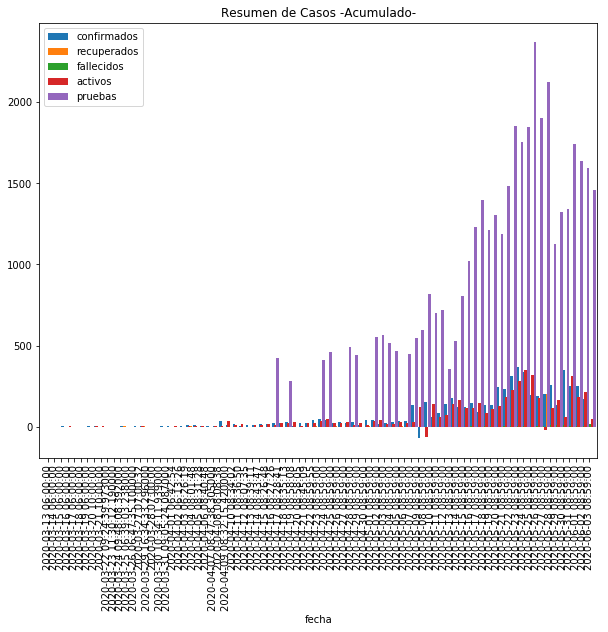

In [10]:
fig1 = plt.figure(figsize=(10,8))
fig1ax1 = fig1.add_subplot(1,1,1)
fig1ax1.set_title('Resumen de Casos -Acumulado-')
reversed_cumsum = casos-casos.shift(1).fillna(0)
reversed_cumsum.plot.bar(ax = fig1ax1 , width = 2)

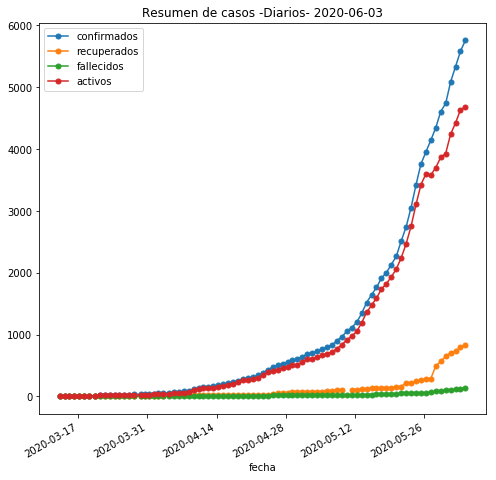

In [11]:
fig2 = plt.figure(figsize=(8,8))
fig2ax1 = fig2.add_subplot(1,1,1)
fig2ax1.set_title('Resumen de casos -Diarios- {}'.format(casos.index.tolist()[-1].strftime('%Y-%m-%d')))
casos[['confirmados','recuperados','fallecidos','activos']].plot( ax = fig2ax1, marker='.',markersize=10)
fig2.savefig("../imgs/resumen.png".format())

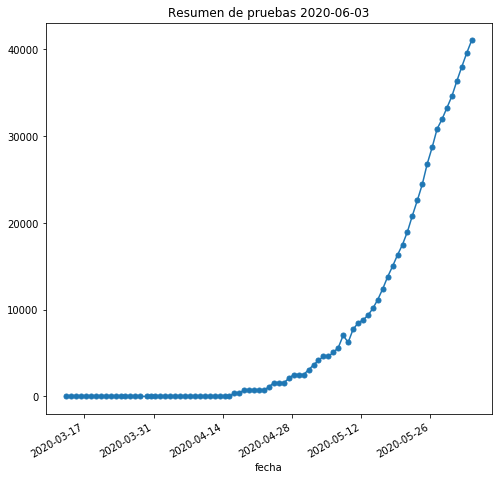

In [12]:
fig3 = plt.figure(figsize=(8,8))
fig3ax1 = fig3.add_subplot(1,1,1)
fig3ax1.set_title('Resumen de pruebas {}'.format(casos.index.tolist()[-1].strftime('%Y-%m-%d')))
casos['pruebas'].plot( ax = fig3ax1, marker='.',markersize=10)
fig3.savefig("../imgs/pruebas.png".format())

In [13]:
print('confirmados: ', max(casos['confirmados']))
print('recuperados: ', max(casos['recuperados']))
print('fallecidos: ', max(casos['fallecidos']))
print('activos: ', max(casos['activos']))
print('pruebas realizadas: ',max(casos['pruebas']))

confirmados:  5760
recuperados:  824.0
fallecidos:  143
activos:  4686
pruebas realizadas:  41035
